Project: Cisco Data Centre Analytics
**bold text**


In [347]:
#######################################
###!@0 START INIT ENVIRONMENT
from google.colab import drive
drive.mount('/content/drive')
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!tar xf /content/drive/Shareddrives/DA231-2022-public/spark-3.0.3-bin-hadoop2.7.tgz

!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

###!@0 END INIT ENVIRONMENT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create a Spark Session & Load Data
Do not change this. Standard initialization for the Spark session within colab.

In [349]:
#######################################
###!@1 START OF PYSPARK INIT
# Provides findspark.init() to make pyspark importable as a regular library.
# Resource : https://pypi.org/project/findspark/
import findspark

findspark.init()
findspark.find()

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession.builder\
         .master("local")\
         .appName("Colab")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()
spark
# Spark is ready to go within Colab!
###!@1 END OF PYSPARK INIT

In [350]:
## Cassandra

# from google.colab import drive
# drive.mount('/content/drive')

In [212]:
# !pip install cassandra-driver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.6 MB 4.9 MB/s 


In [213]:
# !python -c 'import cassandra; print (cassandra.__version__)'

3.25.0


In [218]:
# from cassandra.cluster import Cluster
# from cassandra.auth import PlainTextAuthProvider

# cloud_config= {
#          'secure_connect_bundle': '/content/drive/My Drive/secure-connect-switch-dataset.zip'
# }
# auth_provider = PlainTextAuthProvider('hfpkhwpZSpPuWAkjZGbNYMIs', 'EuSo5Ljae7rIu7td_Ka.WcQDJ2f1GpZjS3IOHX2g0Eg.Lp+K_T,7fgrP0MIbXyJlvGt_Bf4-Tc3DK4DKAa9xJeWrt+HB3rCP8stNjZi5kepPdlMAOecQj-h-.jZru0Xq')
# cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
# session = cluster.connect()

# row = session.execute("select release_version from system.local").one()
# if row:
#       print(row[0])
# else:
#       print("An error occurred.")

FileNotFoundError: ignored

In [351]:
# import pacakges required
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql.functions import sum,avg,max,count,format_number
import matplotlib.pyplot as plt


In [352]:
import pyspark
from pyspark.sql import SparkSession
#SparkSession is now the entry point of Spark
#SparkSession can also be construed as gateway to spark libraries
  
#create instance of spark class
spark=SparkSession.builder.appName('data_center_model').getOrCreate()
  
#create spark dataframe of input csv file
df=spark.read.csv('/content/drive/My Drive/sept_dataset.csv'
                  ,inferSchema=True,header=True)
df.show(10)


+---------+----+---------+---------+---------------+-----------------+
|Switch ID|Date|CPU Usage|Fan Speed|CPU Sensor Temp|Power Consumption|
+---------+----+---------+---------+---------------+-----------------+
| Switch_1|   1|       25|    10114|             70|              235|
| Switch_1|   1|       28|    10801|             71|              237|
| Switch_1|   1|       25|    10881|             70|              237|
| Switch_1|   1|       25|    10387|             66|              234|
| Switch_1|   1|       29|    10283|             68|              232|
| Switch_1|   1|       25|    10580|             70|              235|
| Switch_1|   1|       28|    10946|             70|              237|
| Switch_1|   1|       32|    10791|             74|              234|
| Switch_1|   2|       25|     9960|             73|              234|
| Switch_1|   2|       32|    10823|             68|              238|
+---------+----+---------+---------+---------------+-----------------+
only s

In [353]:
df.printSchema()
df.show()
df.count()

root
 |-- Switch ID: string (nullable = true)
 |-- Date: integer (nullable = true)
 |-- CPU Usage: integer (nullable = true)
 |-- Fan Speed: integer (nullable = true)
 |-- CPU Sensor Temp: integer (nullable = true)
 |-- Power Consumption: integer (nullable = true)

+---------+----+---------+---------+---------------+-----------------+
|Switch ID|Date|CPU Usage|Fan Speed|CPU Sensor Temp|Power Consumption|
+---------+----+---------+---------+---------------+-----------------+
| Switch_1|   1|       25|    10114|             70|              235|
| Switch_1|   1|       28|    10801|             71|              237|
| Switch_1|   1|       25|    10881|             70|              237|
| Switch_1|   1|       25|    10387|             66|              234|
| Switch_1|   1|       29|    10283|             68|              232|
| Switch_1|   1|       25|    10580|             70|              235|
| Switch_1|   1|       28|    10946|             70|              237|
| Switch_1|   1|       3

2184

In [354]:
## Prediction

#columns identified as features are as below:
#['Cruise_line','Age','Tonnage','passengers','length','cabins','passenger_density']
#to work on the features, spark MLlib expects every value to be in numeric form
#feature 'Cruise_line is string datatype
#using StringIndexer, string type will be typecast to numeric datatype
#import library strinindexer for typecasting
  
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='Switch ID',outputCol='switch id')
#indexed=indexer.fit(df).transform(df["Power Consumption","CPU Usage","Fan Speed","CPU Sensor Temp"])

indexed=indexer.fit(df).transform(df)

#above code will convert string to numeric feature and create a new dataframe
#new dataframe contains a new feature 'cruise_cat' and can be used further
#feature cruise_cat is now vectorized and can be used to fed to model
for item in indexed.head(5):
    print(item)
    print('\n')


Row(switch id=0.0, Date=1, CPU Usage=25, Fan Speed=10114, CPU Sensor Temp=70, Power Consumption=235)


Row(switch id=0.0, Date=1, CPU Usage=28, Fan Speed=10801, CPU Sensor Temp=71, Power Consumption=237)


Row(switch id=0.0, Date=1, CPU Usage=25, Fan Speed=10881, CPU Sensor Temp=70, Power Consumption=237)


Row(switch id=0.0, Date=1, CPU Usage=25, Fan Speed=10387, CPU Sensor Temp=66, Power Consumption=234)


Row(switch id=0.0, Date=1, CPU Usage=29, Fan Speed=10283, CPU Sensor Temp=68, Power Consumption=232)




In [355]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#creating vectors from features
#Apache MLlib takes input if vector form

assembler=VectorAssembler(inputCols=['CPU Usage','Fan Speed','CPU Sensor Temp'],outputCol='features')

output=assembler.transform(indexed)
output.show()
#output as below

+---------+----+---------+---------+---------------+-----------------+-------------------+
|switch id|Date|CPU Usage|Fan Speed|CPU Sensor Temp|Power Consumption|           features|
+---------+----+---------+---------+---------------+-----------------+-------------------+
|      0.0|   1|       25|    10114|             70|              235|[25.0,10114.0,70.0]|
|      0.0|   1|       28|    10801|             71|              237|[28.0,10801.0,71.0]|
|      0.0|   1|       25|    10881|             70|              237|[25.0,10881.0,70.0]|
|      0.0|   1|       25|    10387|             66|              234|[25.0,10387.0,66.0]|
|      0.0|   1|       29|    10283|             68|              232|[29.0,10283.0,68.0]|
|      0.0|   1|       25|    10580|             70|              235|[25.0,10580.0,70.0]|
|      0.0|   1|       28|    10946|             70|              237|[28.0,10946.0,70.0]|
|      0.0|   1|       32|    10791|             74|              234|[32.0,10791.0,74.0]|

In [356]:
#final data consist of features and label which is crew.
final_data=output.select('features','Power Consumption')
#splitting data into train and test
train_data,test_data=final_data.randomSplit([0.7,0.3])
train_data.describe().show()

+-------+------------------+
|summary| Power Consumption|
+-------+------------------+
|  count|              1575|
|   mean|235.07809523809524|
| stddev|1.9861966946545366|
|    min|               232|
|    max|               238|
+-------+------------------+



In [357]:
test_data.describe().show()

+-------+------------------+
|summary| Power Consumption|
+-------+------------------+
|  count|               609|
|   mean|234.92610837438423|
| stddev| 2.059028129220162|
|    min|               232|
|    max|               238|
+-------+------------------+



In [358]:
#import LinearRegression library
from pyspark.ml.regression import LinearRegression
#creating an object of class LinearRegression
#object takes features and label as input arguments
data_lr=LinearRegression(featuresCol='features',labelCol='Power Consumption')
#pass train_data to train model
data_center_model=data_lr.fit(train_data)
#evaluating model trained for Rsquared error
data_center_results=data_center_model.evaluate(train_data)
  
print('Rsquared Error :',data_center_results.rootMeanSquaredError)
# print(type(data_center_results))
# print(help(data_center_results))
#R2 value shows accuracy of model is 92%
#model accuracy is very good and can be use for predictive analysis

Rsquared Error : 1.98442926851773


In [359]:
#testing Model on unlabeled data
#create unlabeled data from test_data
#testing model on unlabeled data
unlabeled_data=test_data.select('features')
unlabeled_data.show(5)

+------------------+
|          features|
+------------------+
|[25.0,9834.0,74.0]|
|[25.0,9837.0,75.0]|
|[25.0,9878.0,73.0]|
|[25.0,9881.0,65.0]|
|[25.0,9928.0,67.0]|
+------------------+
only showing top 5 rows



In [360]:
predictions=data_center_model.transform(unlabeled_data)
predictions.show(50)
#below are the results of output from test data

+-------------------+------------------+
|           features|        prediction|
+-------------------+------------------+
| [25.0,9834.0,74.0]| 234.9302578908943|
| [25.0,9837.0,75.0]|234.91817808322122|
| [25.0,9878.0,73.0]|234.94962263782148|
| [25.0,9881.0,65.0]|235.05044606430943|
| [25.0,9928.0,67.0]| 235.0326413959722|
| [25.0,9956.0,71.0]|234.98680214460052|
| [25.0,9974.0,71.0]|234.98959212133613|
| [25.0,9984.0,65.0]|235.06641093118546|
| [25.0,9995.0,65.0]|235.06811591696834|
|[25.0,10044.0,69.0]|235.02553163845488|
|[25.0,10051.0,66.0]| 235.0642510407946|
|[25.0,10059.0,65.0]|235.07803583425056|
|[25.0,10076.0,66.0]|235.06812600848298|
|[25.0,10100.0,65.0]|235.08439078125946|
|[25.0,10107.0,74.0]|234.97257253805122|
|[25.0,10124.0,70.0]|235.02538673126196|
|[25.0,10146.0,65.0]|235.09152072180606|
|[25.0,10155.0,72.0]| 235.0051020836042|
|[25.0,10165.0,70.0]| 235.0317416782709|
|[25.0,10184.0,65.0]|235.09741067269238|
|[25.0,10189.0,72.0]|235.01037203966038|
|[25.0,10224.0,6

In [361]:
######################################################
################### Analytics ########################
######################################################
df.show(100)

# df.printSchema()
# df.show()
df.count()

+---------+----+---------+---------+---------------+-----------------+
|Switch ID|Date|CPU Usage|Fan Speed|CPU Sensor Temp|Power Consumption|
+---------+----+---------+---------+---------------+-----------------+
| Switch_1|   1|       25|    10114|             70|              235|
| Switch_1|   1|       28|    10801|             71|              237|
| Switch_1|   1|       25|    10881|             70|              237|
| Switch_1|   1|       25|    10387|             66|              234|
| Switch_1|   1|       29|    10283|             68|              232|
| Switch_1|   1|       25|    10580|             70|              235|
| Switch_1|   1|       28|    10946|             70|              237|
| Switch_1|   1|       32|    10791|             74|              234|
| Switch_1|   2|       25|     9960|             73|              234|
| Switch_1|   2|       32|    10823|             68|              238|
| Switch_1|   2|       25|    10045|             71|              237|
| Swit

2184

In [362]:
newDF = df.groupBy("Date").agg(
    sum("CPU Usage").alias("Total CPU Usage"),
    sum("Fan Speed").alias("Total Fan Speed"),
    sum("CPU Sensor Temp").alias("Total CPU Sensor Temp"), 
    sum("Power Consumption").alias("Total Power Consumption")
)

In [363]:
newDF.show(50)

+----+---------------+---------------+---------------------+-----------------------+
|Date|Total CPU Usage|Total Fan Speed|Total CPU Sensor Temp|Total Power Consumption|
+----+---------------+---------------+---------------------+-----------------------+
|  31|            721|         250823|                 1673|                   5641|
|  28|           2101|         745813|                 5007|                  16917|
|  26|           2055|         754209|                 5015|                  16954|
|  27|           2053|         745940|                 5029|                  16907|
|  12|           2111|         744963|                 5042|                  16918|
|  22|           2102|         752362|                 5044|                  16903|
|   1|           2053|         747365|                 4995|                  16917|
|  13|           2101|         750173|                 5045|                  16914|
|   6|           2064|         746577|                 5058|     

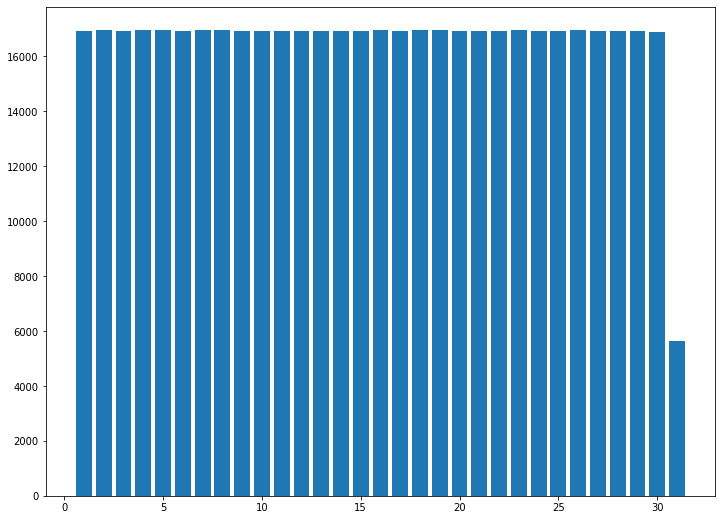

In [364]:
pandas_df = newDF.toPandas()
pandas_df
plt.figure(figsize=(12,9))
#plt.plot(pandas_df["Date"])
#plt.plot(pandas_df["Date"],pandas_df["Total Power Consumption"])
#plt.plot(pandas_df["Date"])

plt.bar(pandas_df["Date"],pandas_df["Total Power Consumption"])
# plt.title("Power consumtion distribution chart")
plt.show()

In [373]:
SwitchPwr = df.groupBy("Switch ID").agg(
    sum("CPU Usage").alias("Total CPU Usage"),
    sum("Fan Speed").alias("Total Fan Speed"),
    sum("CPU Sensor Temp").alias("Total CPU Sensor Temp"), 
    sum("Power Consumption").alias("Total Power Consumption")
)

In [374]:
SwitchPwr.show(20)

+---------+---------------+---------------+---------------------+-----------------------+
|Switch ID|Total CPU Usage|Total Fan Speed|Total CPU Sensor Temp|Total Power Consumption|
+---------+---------------+---------------+---------------------+-----------------------+
| Switch_1|          21135|        7581322|                50943|                 171165|
| Switch_2|          21058|        7575219|                51033|                 171094|
| Switch_3|          21205|        7573656|                50977|                 171059|
+---------+---------------+---------------+---------------------+-----------------------+



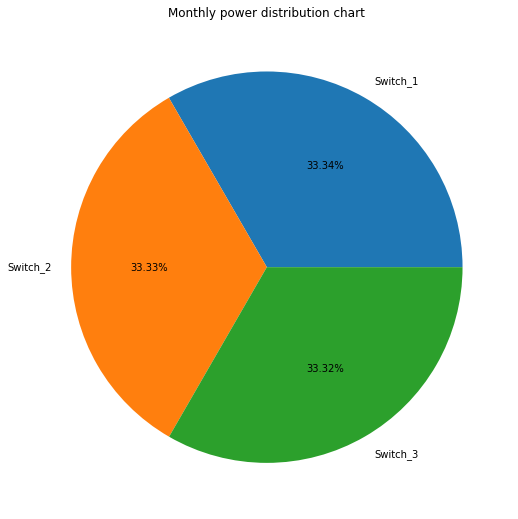

In [403]:
pandas_df = SwitchPwr.toPandas()
pandas_df
plt.figure(figsize=(12,9))
plt.pie(pandas_df["Total Power Consumption"], labels = pandas_df["Switch ID"], autopct = "%1.2f%%")
plt.title("Monthly power distribution chart")
plt.show()

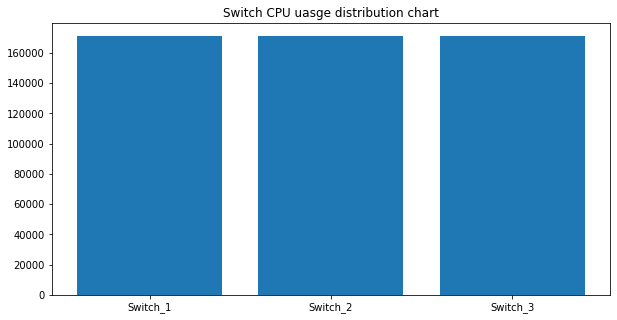

In [401]:
plt.figure(figsize=(10,5))
plt.bar(pandas_df["Switch ID"], pandas_df["Total Power Consumption"])
plt.title("Switch CPU uasge distribution chart")
plt.show()

In [413]:
#SwitchPwr.show(10)
CostDF = SwitchPwr.withColumn("Total cost",SwitchPwr["Total Power Consumption"]*0.1)
CostDF.show()

+---------+---------------+---------------+---------------------+-----------------------+----------+
|Switch ID|Total CPU Usage|Total Fan Speed|Total CPU Sensor Temp|Total Power Consumption|Total cost|
+---------+---------------+---------------+---------------------+-----------------------+----------+
| Switch_1|          21135|        7581322|                50943|                 171165|   17116.5|
| Switch_2|          21058|        7575219|                51033|                 171094|   17109.4|
| Switch_3|          21205|        7573656|                50977|                 171059|   17105.9|
+---------+---------------+---------------+---------------------+-----------------------+----------+



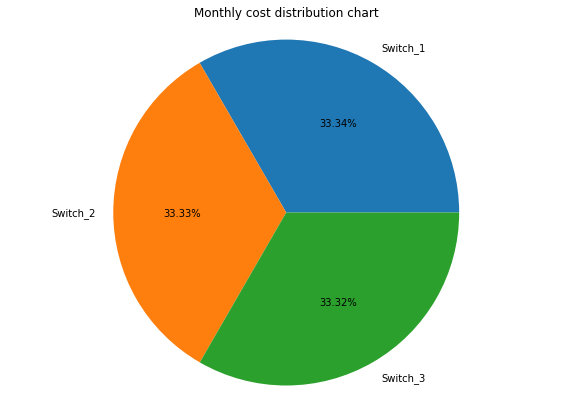

In [417]:
costPan_df = CostDF.toPandas()
plt.figure(figsize=(10,7))
plt.pie(costPan_df["Total cost"], labels = costPan_df["Switch ID"], autopct = "%1.2f%%")
plt.axis('equal')
plt.title("Monthly cost distribution chart")
plt.show()